### Задача: ###
Международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Нужно выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare.

Часть открытых данных есть, например, на сайте archive.org:
https://archive.org/details/201309_foursquare_dataset_umn
    

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#считываем данные из файла
data = pd.read_csv('checkins.dat', sep='|', skipinitialspace=True, skiprows=[1])
data.shape

C:\Users\FerstEnglishBook1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1021967, 6)

In [4]:
data = data.dropna()
data.shape

(396634, 6)

In [5]:
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
7,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
9,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
10,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18


In [6]:
#проверка есть ли повторы
data.duplicated().unique()

array([False])

In [7]:
#проверяем наименования столбцов
data.columns

Index(['id    ', 'user_id ', 'venue_id ', 'latitude      ', 'longitude     ',
       'created_at      '],
      dtype='object')

In [8]:
#удаляем лишние пробелы
data.columns = data.columns.str.strip()
data.columns

Index(['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at'], dtype='object')

Нам требуются только координаты. Поэтому для кластеризации нам нужны столбцы: 'latitude' и 'longitude'

Примичание: На 396634 строках кластеризация будет работать долго. Быть очень терпеливым не возбраняется — результат от этого только улучшится. Но для того, чтобы сдать задание, понадобится сабсет из первых 100 тысяч строк. Это компромисс между качеством и затраченным временем. Обучение алгоритма на всём датасете занимает около часа, а на 100 тыс. строк — примерно 2 минуты, однако этого достаточно для получения корректных результатов.

In [9]:
dataset = data[['latitude', 'longitude']]
dataset.shape

(396634, 2)

In [10]:
dataset = dataset.iloc[:100000,:]
dataset.shape

(100000, 2)

In [11]:
#проверим тип данных
dataset.dtypes

latitude     float64
longitude    float64
dtype: object

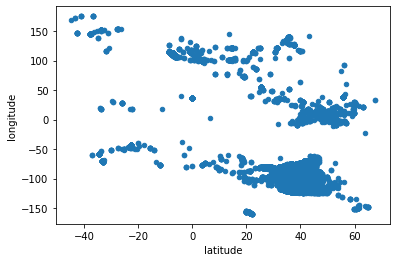

In [12]:
#нарисуем точки на графике
dataset.plot.scatter(x='latitude', y='longitude')

In [13]:
from sklearn.cluster import MeanShift

In [14]:
ms = MeanShift(bandwidth=0.1)
ms.fit(dataset)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [15]:
n_clusters = cluster_centers.shape[0]
n_clusters

3231

In [16]:
dataset['label'] = labels
dataset.head()

,latitude,longitude,label
1,38.895112,-77.036366,5
3,33.800745,-84.410520,7
7,45.523452,-122.676207,30
9,40.764462,-111.904565,65
10,33.448377,-112.074037,1


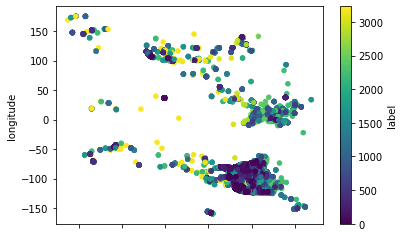

In [17]:
dataset.plot.scatter(x='latitude', y='longitude',c='label', colormap='viridis')

In [34]:
data_clusters = pd.DataFrame(cluster_centers, columns=['latitude','longitude'])
data_clusters['label'] = range(cluster_centers.shape[0])
data_clusters.head()


,latitude,longitude,label
0,40.717716,-73.991835,0
1,33.449438,-112.002140,1
2,33.446380,-111.901888,2
3,41.878244,-87.629843,3
4,37.688682,-122.409330,4


In [35]:
data_clusters['num_elements'] = dataset.groupby('label')['latitude'].count()
data_clusters = data_clusters[data_clusters['num_elements'] > 15]
data_clusters.head()

,latitude,longitude,label,num_elements
0,40.717716,-73.991835,0,12506
1,33.449438,-112.002140,1,4692
2,33.446380,-111.901888,2,3994
3,41.878244,-87.629843,3,3363
4,37.688682,-122.409330,4,3526


In [36]:
data_clusters.shape

(592, 4)

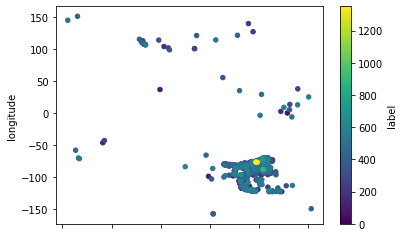

In [37]:
data_clusters.plot.scatter(x='latitude', y='longitude',c='label', colormap='viridis')

In [42]:
offices = np.array([[33.751277, -118.188740, 'Los Angeles'], [25.867736, -80.324116, 'Miami'], [51.503016, -0.075479, 'London'],
                    [52.378894, 4.885084, 'Amsterdam'], [39.366487, 117.036146, 'Beijing'], [-33.868457, 151.205134, 'Sydney']])
data_offices = pd.DataFrame(offices, columns=['latitude','longitude', 'City'])
data_offices

,latitude,longitude,City
0,33.751277,-118.18874,Los Angeles
1,25.867736,-80.324116,Miami
2,51.503016,-0.075479,London
3,52.378894,4.885084,Amsterdam
4,39.366487,117.036146,Beijing
5,-33.868457,151.205134,Sydney


In [62]:
data_offices[['latitude','longitude']] = data_offices[['latitude','longitude']].astype(float)

In [63]:
data_offices.dtypes

latitude     float64
longitude    float64
City          object
dtype: object

In [59]:
from scipy.spatial.distance import euclidean

In [64]:
for i, row in data_offices.iterrows():
    data_clusters[row['City']] = data_clusters.apply(lambda row_clusters: 
                                                     euclidean([row_clusters['latitude'], row_clusters['longitude']], [row['latitude'], row['longitude']]), axis=1)    
data_clusters.head()

,latitude,longitude,label,num_elements,Los Angeles,Miami,London,Amsterdam,Beijing,Sydney
0,40.717716,-73.991835,0,12506,44.742571,16.143720,74.699066,79.734255,191.032760,237.227259
1,33.449438,-112.002140,1,4692,6.193959,32.572679,113.373317,118.410081,229.114704,271.679532
2,33.446380,-111.901888,2,3994,6.294241,32.474475,113.274833,118.311609,229.014565,271.581649
3,41.878244,-87.629843,3,3363,31.621097,17.598580,88.081797,93.108944,204.681402,250.558794
4,37.688682,-122.409330,4,3526,5.772048,43.713842,123.111360,128.139261,239.451355,282.816724


In [75]:
data_offices['min_distance'] = data_offices.apply(lambda row: data_clusters[row['City']].min(), axis=1)

data_offices

,latitude,longitude,City,min_distance
0,33.751277,-118.188740,Los Angeles,0.070848
1,25.867736,-80.324116,Miami,0.022674
2,51.503016,-0.075479,London,0.050058
3,52.378894,4.885084,Amsterdam,0.009353
4,39.366487,117.036146,Beijing,9.267575
5,-33.868457,151.205134,Sydney,0.007835


In [67]:
min(data_offices['min_distance'])

0.007834758163107856

In [88]:
answer_office = data_offices.loc[data_offices['min_distance'].idxmin()]
answer_cluster = data_clusters[data_clusters[answer_office['City']] == answer_office['min_distance']]
answer_cluster


,latitude,longitude,label,num_elements,Los Angeles,Miami,London,Amsterdam,Beijing,Sydney
420,-33.86063,151.204776,420,28,277.748513,239.108983,173.702814,169.843186,80.806596,0.007835


In [89]:
with open('ans.txt','w') as file:
    file.write(answer_cluster[['latitude','longitude']].to_string(header=False, index=False))